In [53]:
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
print("Imports Complete")

Imports Complete


In [58]:
def QFTrot(circuit, n):
    #Does the rotations needed for the quantum fourier transform \
    #For a given qubit, there's a controlled rotation by pi/2 to the qubit above, then pi/4 two up, then pi/8 3 up, and so on
    
    if n == 0: #Base case for recursion, end the algorithm
        return circuit
    
    n -= 1 #start on qubit n-1 (because of python list indexing)
    
    circuit.h(n) #Apply the Hadamard
    for qubit in range(n):
        
        #Apply a controlled rotation by pi/2*(difference in numbers between the qubits), as described above
        #These rotations are the coefficients in the expanded Fourier transform equation
        circuit.cp(pi/2**(n-qubit), qubit, n) 
        
    qft_rotations(circuit, n)   #Recur!    

In [59]:
def swapgates(circuit, n):
    #Performs the swap operations at the end of the QFT
    for qubit in range(n//2):
        #Swaps the ith qubit with with the (n-1)-ith qubit
        circuit.swap(qubit, n-qubit-1)
    return circuit

In [60]:
def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    QFTrot(circuit, n)
    swapgates(circuit, n)
    return circuit

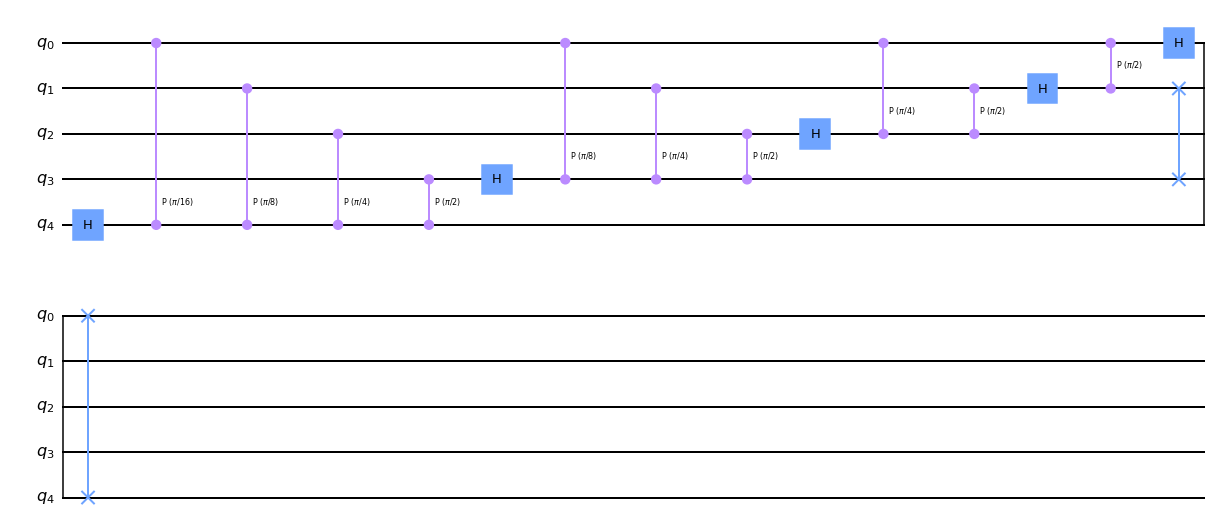

In [67]:
#Example of a 5-qubit Fourier transform
num_qubits=5; #Define the number of qubits in the transform 
#With 5 bits we get 2^5 values we can represent in binary
qc = QuantumCircuit(num_qubits)

#Perform the QFT and draw the circuit
qft(qc,num_qubits); 
qc.draw('mpl')


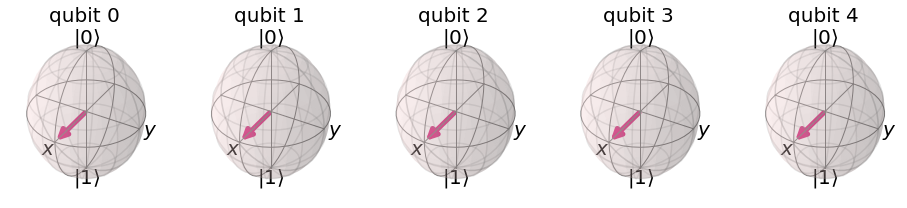

In [64]:
#Show the outcome of the circuit
#We see that each qubit is in the 0-state in the Fourier basis, as expected

sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

In [72]:
#Now try to approximate a number. Get the value of 23 in binary
bin(3)

'0b11'

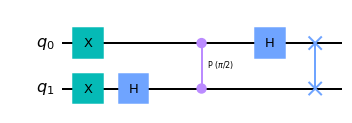

In [73]:
num_qubits=2; #Define the number of qubits in the transform 
qc2 = QuantumCircuit(num_qubits)

#Perform the QFT and draw the circuit
qc2.x(0)
qc2.x(1)
qft(qc2,num_qubits); 
qc2.draw('mpl')


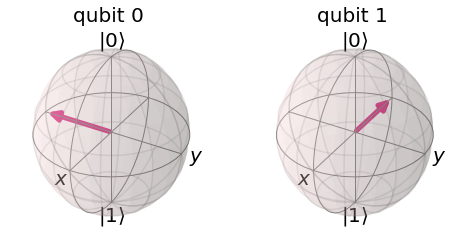

In [74]:
#Show the outcome of the circuit
#The first qubit is rotated by 3/4 turns, and the second by 6/4 = 1/3 turns. This is what we expect!
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc2)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

In [84]:
#Something a little more ambitious - let's try representing something on 5 qubits
#We'll choose the easiest one, which is 16
bin(16)

'0b10000'

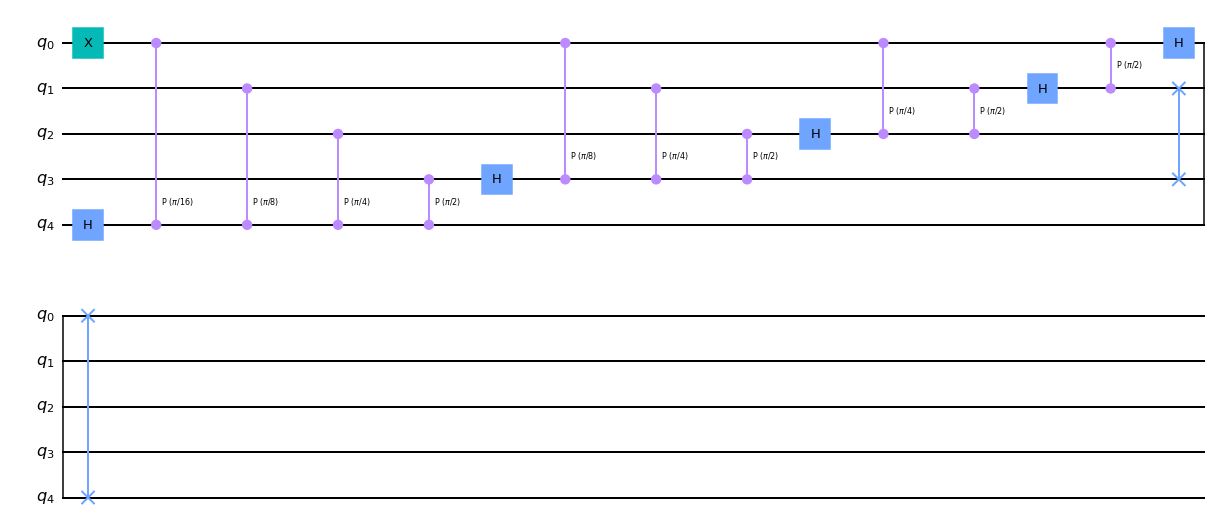

In [87]:
num_qubits=5; #Define the number of qubits in the transform 
qc2 = QuantumCircuit(num_qubits)

#Perform the QFT and draw the circuit
qc2.x(0)
qft(qc2,num_qubits); 
qc2.draw('mpl')

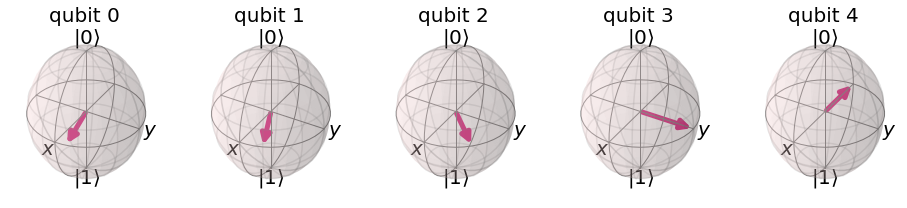

In [88]:
#Show the outcome of the circuit
#The first qubit is rotated by 1/32, the second by 1/16, the third by 1/8, the fourth by 1/4, and the fifth by 1/2
#This is what we expect! Our QFT is robust and scalable
sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc2)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)